In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eshit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import pandas as pd
df = pd.read_csv("Sentiment_Stock_data.csv")
df.head()

,Unnamed: 0,Sentiment,Sentence
0,0,0,"According to Gran , the company has no plans t..."
1,1,1,"For the last quarter of 2010 , Componenta 's n..."
2,2,1,"In the third quarter of 2010 , net sales incre..."
3,3,1,Operating profit rose to EUR 13.1 mn from EUR ...
4,4,1,"Operating profit totalled EUR 21.1 mn , up fro..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108751 entries, 0 to 108750
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  108751 non-null  int64 
 1   Sentiment   108751 non-null  int64 
 2   Sentence    108750 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.5+ MB


In [9]:
df['Sentiment'].value_counts()

Sentiment
1    55725
0    53026
Name: count, dtype: int64

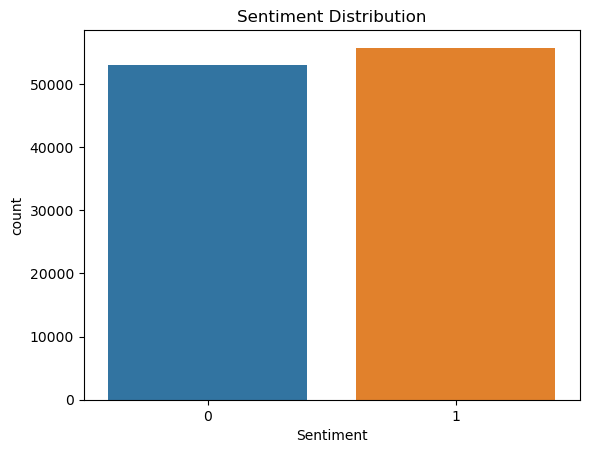

In [10]:
sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

In [14]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub('[^a-z]', ' ', text)
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_review'] = df['Sentence'].apply(preprocess_text)
df.head()


,Unnamed: 0,Sentiment,Sentence,cleaned_review
0,0,0,"According to Gran , the company has no plans t...",accord gran compani plan move product russia a...
1,1,1,"For the last quarter of 2010 , Componenta 's n...",last quarter componenta net sale doubl eur eur...
2,2,1,"In the third quarter of 2010 , net sales incre...",third quarter net sale increas eur mn oper pro...
3,3,1,Operating profit rose to EUR 13.1 mn from EUR ...,oper profit rose eur mn eur mn correspond peri...
4,4,1,"Operating profit totalled EUR 21.1 mn , up fro...",oper profit total eur mn eur mn repres net sale


In [16]:
tfidf = TfidfVectorizer(max_features=100)
X = tfidf.fit_transform(df['cleaned_review']).toarray()
y = df['Sentiment']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5212407282535402
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.19      0.28     15996
           1       0.52      0.84      0.64     16630

    accuracy                           0.52     32626
   macro avg       0.53      0.51      0.46     32626
weighted avg       0.53      0.52      0.46     32626



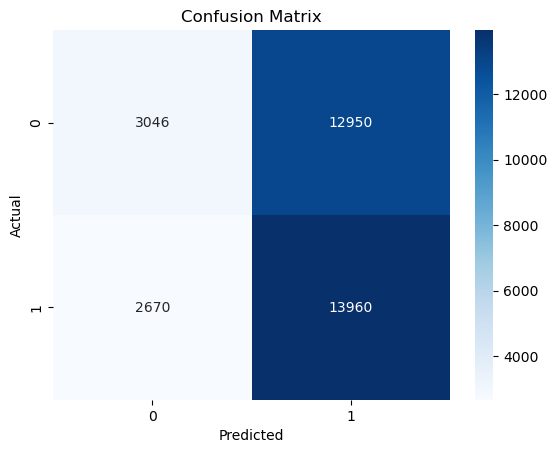

In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [22]:
sample_text = ["This product is very good and I am satisfied"]
sample_text_cleaned = [preprocess_text(sample_text[0])]
sample_vector = tfidf.transform(sample_text_cleaned).toarray()
prediction = model.predict(sample_vector)
print("Sentiment Prediction:", "Positive" if prediction[0] == 1 else "Negative")

Sentiment Prediction: Positive
